# Modeling Driven RLC Circuit with Experimental Data and Computational Mode

In [25]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics
from tqdm import tqdm

In [26]:
# Constants
resistance = [45.7, 60.4]
inductance = 0.02421893575
capacitance = [0.00001, 0.000001]
voltage = [5, 10]
frequency_initial = 0
frequency_final = 2000

In [27]:
def compute_models(resistance, inductance, capacitance, voltage):
    def compute_model(frequency):
        angular_frequency = 2 * math.pi * frequency

        def compute_acceleration(t, charge, current, _current_prime):
            return voltage * math.sin(angular_frequency * t) / inductance / 2 - resistance * current / inductance - charge / (inductance * capacitance)

        times = np.linspace(0, 0.1, 10001)
        _, _, current, _ = model_utils.euler_method(compute_acceleration, times=times)

        # Calculate the amplitude by checking the max value in the last five seconds
        return max(current[-5000:])

    data = pd.read_csv(f"Data/AmplitudeFrequency/Driven RLC {resistance}Ω {round(inductance * 1000, 2)}mH {int(capacitance * 1000000)}µF {voltage}V amplitude.csv")

    frequencies = np.linspace(frequency_initial, frequency_final, 201)
    amplitudes = list(map(compute_model, tqdm(frequencies)))

    # Graph frequency vs amplitude
    model_utils.graph([(frequencies, amplitudes, "Computational"), (data["Frequency (Hz)"], data["Amplitude (A)"], "Experimental")], "Amplitude", "A", "Frequency", "Hz", f"{resistance}Ω {inductance}H {capacitance}F {voltage}V", ".", f"Graphs/ResponseCurve_{resistance}Ω_{inductance}H_{capacitance}F_{voltage}V")

100%|██████████| 201/201 [00:01<00:00, 102.00it/s]


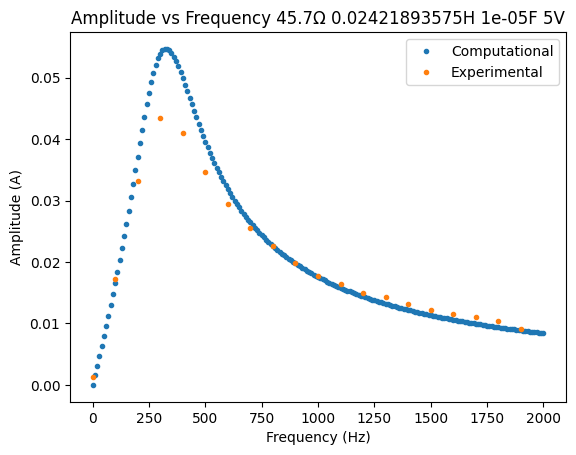

100%|██████████| 201/201 [00:02<00:00, 97.11it/s] 


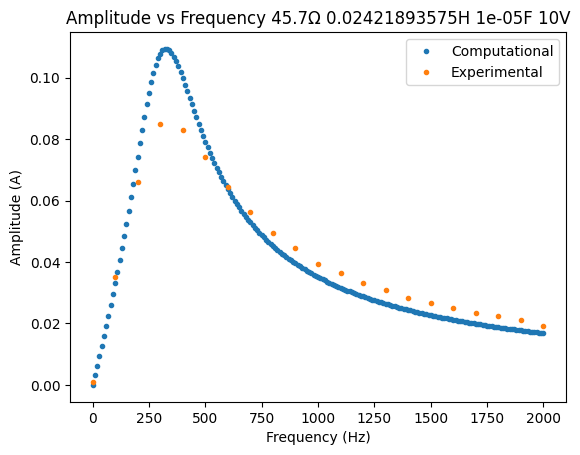

100%|██████████| 201/201 [00:02<00:00, 93.57it/s] 


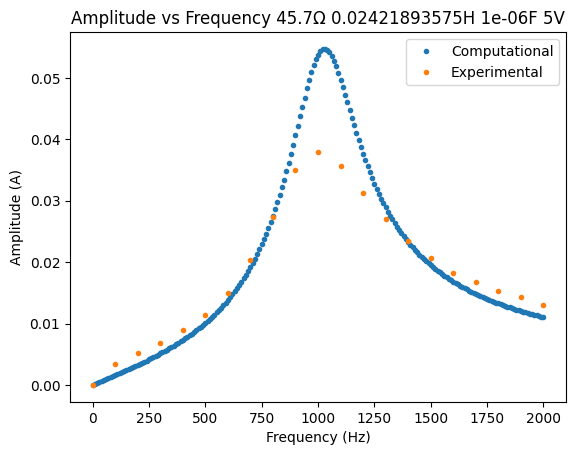

100%|██████████| 201/201 [00:02<00:00, 90.41it/s] 


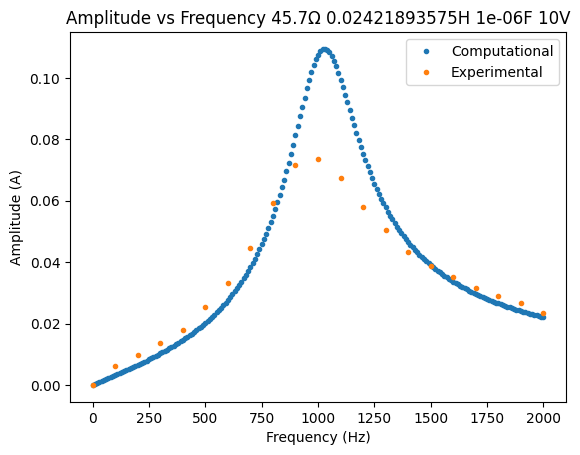

FileNotFoundError: [Errno 2] No such file or directory: 'Data/AmplitudeFrequency/Driven RLC 60.4Ω 24.22mH 10µF 5V amplitude.csv'

In [28]:
compute_models(resistance[0], inductance, capacitance[0], voltage[0])
compute_models(resistance[0], inductance, capacitance[0], voltage[1])
compute_models(resistance[0], inductance, capacitance[1], voltage[0])
compute_models(resistance[0], inductance, capacitance[1], voltage[1])
compute_models(resistance[1], inductance, capacitance[0], voltage[0])
compute_models(resistance[1], inductance, capacitance[0], voltage[1])
compute_models(resistance[1], inductance, capacitance[1], voltage[0])
compute_models(resistance[1], inductance, capacitance[1], voltage[1])